# ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ***Importing Dataset***

In [ ]:
df=pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
# the mean of the salary

mean_salary = df['Salary'].mean()
print(f"The mean of the salary is: {mean_salary}")

The mean of the salary is: 76004.0


In [ ]:
# Calculate the mean of YearsExperience
mean_years_experience = df['YearsExperience'].mean()
print(f"The mean of Years of Experience:{mean_years_experience}")

The mean of Years of Experience:5.413333333333332


# ***Calculating residuals***

In [ ]:
# residual of the salary

df['Residual'] = df['Salary'] - mean_salary
print(df)

    YearsExperience    Salary  Residual
0               1.2   39344.0  -36660.0
1               1.4   46206.0  -29798.0
2               1.6   37732.0  -38272.0
3               2.1   43526.0  -32478.0
4               2.3   39892.0  -36112.0
5               3.0   56643.0  -19361.0
6               3.1   60151.0  -15853.0
7               3.3   54446.0  -21558.0
8               3.3   64446.0  -11558.0
9               3.8   57190.0  -18814.0
10              4.0   63219.0  -12785.0
11              4.1   55795.0  -20209.0
12              4.1   56958.0  -19046.0
13              4.2   57082.0  -18922.0
14              4.6   61112.0  -14892.0
15              5.0   67939.0   -8065.0
16              5.2   66030.0   -9974.0
17              5.4   83089.0    7085.0
18              6.0   81364.0    5360.0
19              6.1   93941.0   17937.0
20              6.9   91739.0   15735.0
21              7.2   98274.0   22270.0
22              8.0  101303.0   25299.0
23              8.3  113813.0   37809.0


# ***Graph between Salary,Mean Salary vs. Experience***

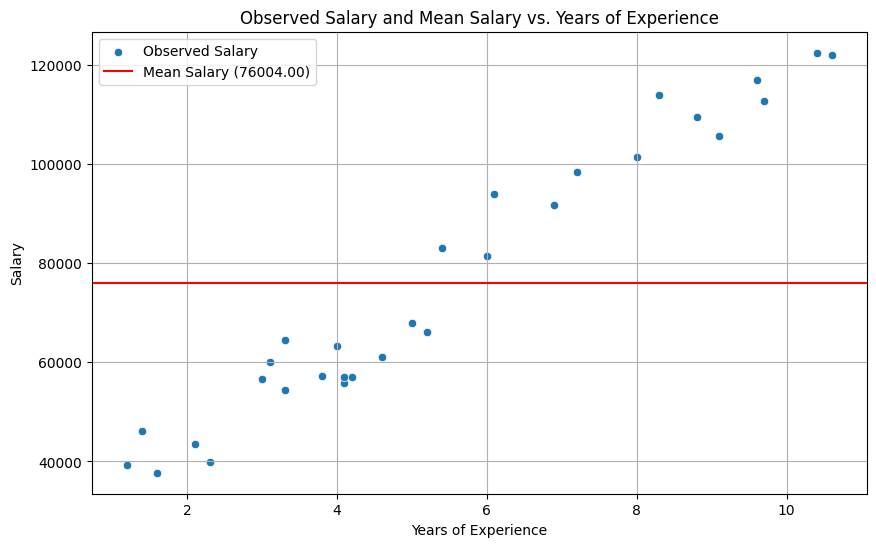

In [ ]:
# the graph of mean value of salary with the observed salary values

# the data is sorted by YearsExperience for a more meaningful line plot
df_sorted = df.sort_values(by='YearsExperience')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the actual salary values
sns.scatterplot(x='YearsExperience', y='Salary', data=df_sorted, label='Observed Salary')

# Plot the mean salary line
plt.axhline(y=mean_salary, color='r', linestyle='-', label=f'Mean Salary ({mean_salary:.2f})')

plt.title('Observed Salary and Mean Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


# ***SSE- When predicted value is only mean***

In [ ]:
# sse - residual sum of squares

# Square the residuals
# sse=sst
#predicted value = mean
# sse=∑(observed value-predicted value)**2
df['Squared_Residual'] = df['Residual'] ** 2

# Calculate the Sum of Squared Errors (SSE)
sse = df['Squared_Residual'].sum()

print(f"The Sum of Squared Errors (SSE) is: {sse}")

The Sum of Squared Errors (SSE) is: 21794977852.0


# ***Calculating slope of line***

In [ ]:
# Calculate β1 (slope) using the formula: β1 = Sum of (xi - x_bar) * (yi - y_bar) / Sum of (xi - x_bar)^2

#Numerator
# Calculate (xi - x_bar)
df['YearsExperience_deviation'] = df['YearsExperience'] - mean_years_experience

# Calculate (yi - y_bar) which is the 'Residual' column
# df['Salary_deviation'] = df['Salary'] - mean_salary

# Calculate the product of the deviations
df['product_of_deviations'] = df['YearsExperience_deviation'] * df['Residual']

# Calculate the sum of the products of deviations
sum_of_products_of_deviations = df['product_of_deviations'].sum()

#Denominator
# Calculate (xi - x_bar)^2
df['YearsExperience_deviation_squared'] = df['YearsExperience_deviation'] ** 2

# Calculate the sum of the squared deviations of YearsExperience
sum_of_years_experience_deviation_squared = df['YearsExperience_deviation_squared'].sum()

# Calculate beta1
β1 = sum_of_products_of_deviations / sum_of_years_experience_deviation_squared

print(f"The calculated β1 (slope) is: {β1}")


The calculated β1 (slope) is: 9449.962321455076


#***Calculating intercept***

In [ ]:
# Calculate β0 (intercept) using the formula: β0 = y_bar - β1 * x_bar
β0 = mean_salary - (β1 * mean_years_experience)

print(f"The calculated β0 (intercept) is: {β0}")

The calculated β0 (intercept) is: 24848.2039665232


# ***Predicted salary***

In [ ]:
# Predict y using the equation of linear regression:
#y = β0 + β1 * x
# Where y is predicted Salary and x is YearsExperience

# Add a new column for predicted salary
df['Predicted_Salary'] = β0 + β1 * df['YearsExperience']

print(df[['YearsExperience', 'Salary','Residual', 'Predicted_Salary']])

    YearsExperience    Salary  Residual  Predicted_Salary
0               1.2   39344.0  -36660.0      36188.158752
1               1.4   46206.0  -29798.0      38078.151217
2               1.6   37732.0  -38272.0      39968.143681
3               2.1   43526.0  -32478.0      44693.124842
4               2.3   39892.0  -36112.0      46583.117306
5               3.0   56643.0  -19361.0      53198.090931
6               3.1   60151.0  -15853.0      54143.087163
7               3.3   54446.0  -21558.0      56033.079627
8               3.3   64446.0  -11558.0      56033.079627
9               3.8   57190.0  -18814.0      60758.060788
10              4.0   63219.0  -12785.0      62648.053252
11              4.1   55795.0  -20209.0      63593.049484
12              4.1   56958.0  -19046.0      63593.049484
13              4.2   57082.0  -18922.0      64538.045717
14              4.6   61112.0  -14892.0      68318.030645
15              5.0   67939.0   -8065.0      72098.015574
16            

# ***Plotting Regression line***

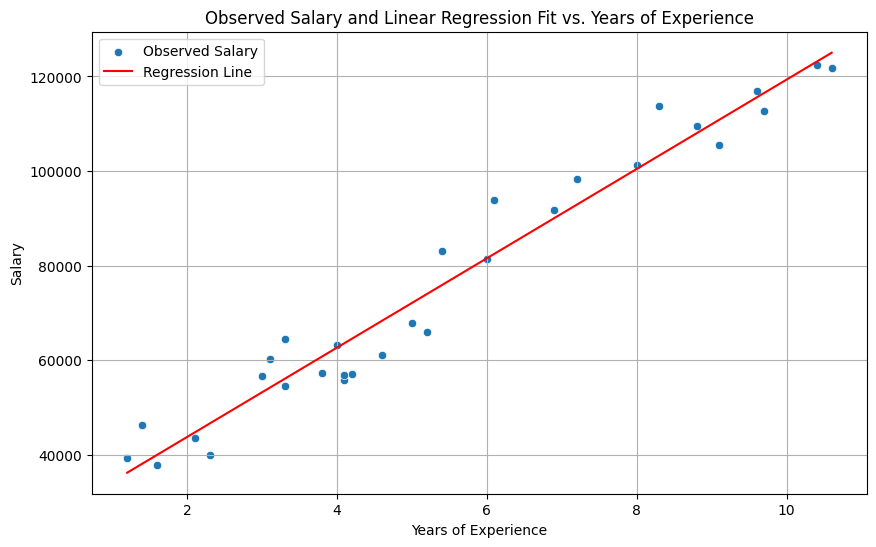

In [ ]:
import matplotlib.pyplot as plt
# Plot the original data and the regression line
plt.figure(figsize=(10, 6))

# Plot the observed salary values
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary')

# Plot the regression line
plt.plot(df['YearsExperience'], df['Predicted_Salary'], color='red', label='Regression Line')

plt.title('Observed Salary and Linear Regression Fit vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

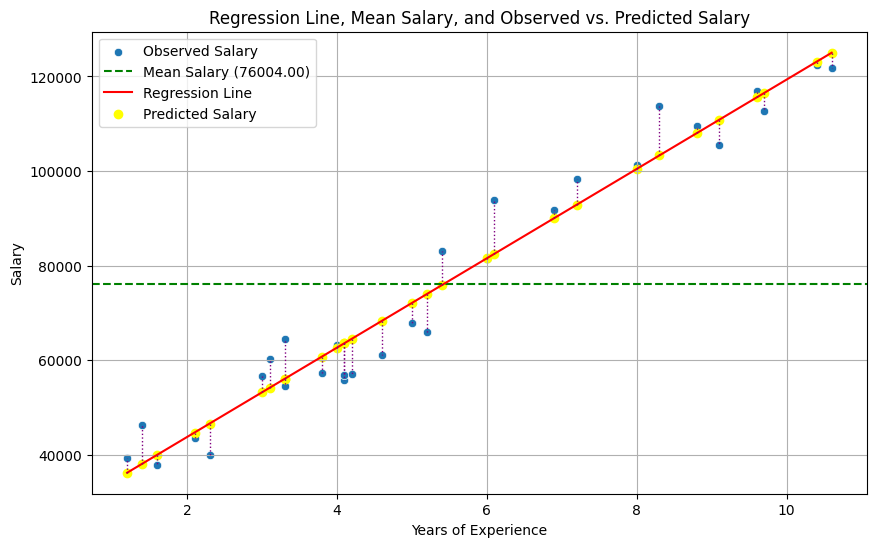

In [ ]:
# plot the graph of regression line,meansalary,salary vs year of experience.


plt.figure(figsize=(10, 6))

# Plot observed salary
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary')

# Plot the mean salary line
plt.axhline(y=mean_salary, color='green', linestyle='--', label=f'Mean Salary ({mean_salary:.2f})')

# Plot the regression line
plt.plot(df['YearsExperience'], df['Predicted_Salary'], color='red', label='Regression Line')

# Plot predicted points on the regression line in yellow
plt.scatter(df['YearsExperience'], df['Predicted_Salary'], color='yellow', label='Predicted Salary')


# Plot dotted lines from predicted to observed values
for index, row in df.iterrows():
    plt.plot([row['YearsExperience'], row['YearsExperience']], [row['Predicted_Salary'], row['Salary']], color='purple', linestyle=':', linewidth=1)


plt.title('Regression Line, Mean Salary, and Observed vs. Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


# ***Calculating SSE from regression line***

In [ ]:
# calculate sse

# SSE from the regression line
# sse = sum of (observed value - predicted value)**2

# Calculate the residual from the regression line (observed - predicted)
df['Regression_Residual'] = df['Salary'] - df['Predicted_Salary']

# Square the regression residuals
df['Regression_Squared_Residual'] = df['Regression_Residual'] ** 2

# Calculate the Sum of Squared Errors (SSE) from the regression line
sse_regression = df['Regression_Squared_Residual'].sum()

print(f"The Sum of Squared Errors (SSE) from the regression line is: {sse_regression}")

The Sum of Squared Errors (SSE) from the regression line is: 938128551.6684284


# **SSR = Sum of square of regression**

In [ ]:
# ssr = sst - sse_regression
# or ssr = sum of (predicted value - mean)**2

# Calculate the difference between predicted value and mean
df['Predicted_minus_mean'] = df['Predicted_Salary'] - mean_salary

# Square the difference
df['Predicted_minus_mean_squared'] = df['Predicted_minus_mean'] ** 2

# Calculate the Sum of Squares for Regression (SSR)
ssr = df['Predicted_minus_mean_squared'].sum()

print(f"The Sum of Squares for Regression (SSR) is: {ssr}")

The Sum of Squares for Regression (SSR) is: 20856849300.331562


# ***Calculating SST***

In [ ]:
# calculate sst

# SST = sum of (observed value - mean)**2

# Calculate the squared difference between observed salary and the mean salary
df['SST_component'] = (df['Salary'] - mean_salary) ** 2

# Calculate the Sum of Squares Total (SST)
sst = df['SST_component'].sum()

print(f"The Sum of Squares Total (SST) is: {sst}")

The Sum of Squares Total (SST) is: 21794977852.0


In [ ]:
# Verify the relationship: SST = SSR + SSE_regression
# SST = SSR + SSE (from regression line)
print(f"Verification (SSR + SSE_regression): {ssr + sse_regression}")

Verification (SSR + SSE_regression): 21794977851.999992


# ***Calculating R square***

In [ ]:
# calculating R**2
# R **2=ssr/sst
print(f"calculating R^2: {ssr / sst}")

#an R-squared statistic of 0.95 means that the regression model explains 95% of the variability of the outcome variable.
#Therefore, it is generally considered a very good fit for the data.

calculating R^2: 0.9569566641435081


# ***Mean Square Error(s-square)***

In [ ]:
# Mean squared error(MSE)(s^2)= SSE/df_residual
# df_residual=n-2
n=len(df)
df_residual=n-2
mse = sse_regression / df_residual

print(f"The Residual Standard Error squared (s^2) or MSE is: {mse}")

The Residual Standard Error squared (s^2) or MSE is: 33504591.1310153


# ***Residual standard error***

In [ ]:
# Calculate the Residual Standard Error (s) OR standard error of the estimate is the standard deviation of the error term ɛ
# s = sqrt(MSE)
rse = np.sqrt(mse)

print(f"The Residual Standard Error (RSE) is: {rse}")

The Residual Standard Error (RSE) is: 5788.315051119393


# ***Standard error of slope***

In [ ]:
#standard error of the slope
# SE_β1 = s / sqrt(Sum of (xi - x_bar)^2)
se_β1 = rse / np.sqrt(sum_of_years_experience_deviation_squared)

print(f"The Standard Error of the slope (SE_β1) is: {se_β1}")

The Standard Error of the slope (SE_β1) is: 378.7545742388209


# ***Standard Error of intercept***

In [ ]:
# Calculate the standard error of the intercept (β0)
# SE_β0 = s * sqrt(1/n + mean_years_experience^2 / Sum of (xi - x_bar)^2)
se_β0 = rse * np.sqrt(1/n + (mean_years_experience**2) / sum_of_years_experience_deviation_squared)

print(f"The Standard Error of the intercept (SE_β0) is: {se_β0}")

The Standard Error of the intercept (SE_β0) is: 2306.653709065003


# ***Hypotheses***

In [ ]:
# Define the null and alternative hypotheses for the slope (β1)
# Null Hypothesis (H0): β1 = 0 (There is no linear relationship between YearsExperience and Salary)
# Alternative Hypothesis (HA): β1 ≠ 0 (There is a linear relationship between YearsExperience and Salary)
print(f"Null Hypothesis (H0): β1 = 0")
print(f"Alternative Hypothesis (HA): β1 ≠ 0")

Null Hypothesis (H0): β1 = 0
Alternative Hypothesis (HA): β1 ≠ 0


# ***t-Statistic***

In [ ]:
# calculate the t-statistic for the slope (β1)
# t = (β1 - hypothesized_β1) / SE_β1
# Under the null hypothesis, hypothesized_β1 = 0
t_statistic = β1 / se_β1

print(f"The calculated t-statistic is: {t_statistic}")

The calculated t-statistic is: 24.950094240964788


# ***t-critical***

In [ ]:
# Define the level of significance (alpha)
alpha = 0.05

# Calculate the critical t-value for a two-tailed test
# Degrees of freedom (df) for the t-test is n - 2
degrees_of_freedom = n - 2
print(f"The degrees of freedom (df) are: {degrees_of_freedom}")

t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
print(f"t-critical: {t_critical}")


The degrees of freedom (df) are: 28
t-critical: 2.048407141795244


# ***Confidence Interval Range***

In [ ]:
# Interpret the confidence interval for the intercept (be cautious with interpretation if x=0 is not meaningful)
# Calculate the confidence interval for the slope (β1)
# CI = β1 ± t_critical * SE_β1
lower_bound = β1 - (t_critical * se_β1)
upper_bound = β1 + (t_critical * se_β1)

print(f"The {100*(1-alpha):.0f}% Confidence Interval for the slope (β1) is: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Interpret the confidence interval
print(f"We are {100*(1-alpha):.0f}% confident that for every one-unit increase in YearsExperience, the average Salary increases by an amount between {lower_bound:.2f} and {upper_bound:.2f}.")

The 95% Confidence Interval for the slope (β1) is: [8674.1187, 10225.8059]
We are 95% confident that for every one-unit increase in YearsExperience, the average Salary increases by an amount between 8674.12 and 10225.81.


# ***Results***

In [ ]:
# Make a decision based on the t-statistic and t-critical value
if abs(t_statistic) > t_critical:
    print("Decision: Reject the null hypothesis (H0).")
    print("Conclusion: There is sufficient evidence to conclude that there is a significant linear relationship between YearsExperience and Salary.")
else:
    print("Decision: Fail to reject the null hypothesis (H0).")
    print("Conclusion: There is not enough evidence to conclude that there is a significant linear relationship between YearsExperience and Salary.")


Decision: Reject the null hypothesis (H0).
Conclusion: There is sufficient evidence to conclude that there is a significant linear relationship between YearsExperience and Salary.


In [ ]:
# Calculate the p-value for the t-statistic
# The p-value is the probability of observing a t-statistic as extreme as, or more extreme than, the calculated t-statistic, assuming the null hypothesis is true.
# Since it's a two-tailed test, we multiply the survival function (1 - cdf) by 2.
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

print(f"The p-value for the t-test is: {p_value}")

# Compare the p-value to the significance level (alpha) to make a decision
if p_value < alpha:
  print(f"Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
  print("Conclusion: There is statistically significant evidence to suggest a linear relationship between YearsExperience and Salary.")
else:
  print(f"Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
  print("Conclusion: There is not statistically significant evidence to suggest a linear relationship between YearsExperience and Salary.")


The p-value for the t-test is: 0.0
Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
Conclusion: There is statistically significant evidence to suggest a linear relationship between YearsExperience and Salary.


In [ ]:
# Define the level of significance (alpha)
alpha = 0.05

# Calculate the critical t-value for a two-tailed test
# Degrees of freedom (df) for the t-test is n - 2
degrees_of_freedom = n - 2
t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

print(f"t-critical: {t_critical}")
# Confidence Interval = β0 ± (t_critical * SE_β0)
lower_bound_ci_β0 = β0 - (t_critical * se_β0)
upper_bound_ci_β0 = β0 + (t_critical * se_β0)

print(f"The {(1-alpha)*100}% confidence interval for the intercept (β0) is: ({lower_bound_ci_β0:.4f}, {upper_bound_ci_β0:.4f})")

# Interpret the confidence interval for the intercept (be cautious with interpretation if x=0 is not meaningful)
print(f"We are {(1-alpha)*100}% confident that the average Salary for someone with 0 years of experience is between {lower_bound_ci_β0:.2f} and {upper_bound_ci_β0:.2f}.")


t-critical: 2.048407141795244
The 95.0% confidence interval for the intercept (β0) is: (20123.2380, 29573.1699)
We are 95.0% confident that the average Salary for someone with 0 years of experience is between 20123.24 and 29573.17.


# ***Confidence Interval Graph***

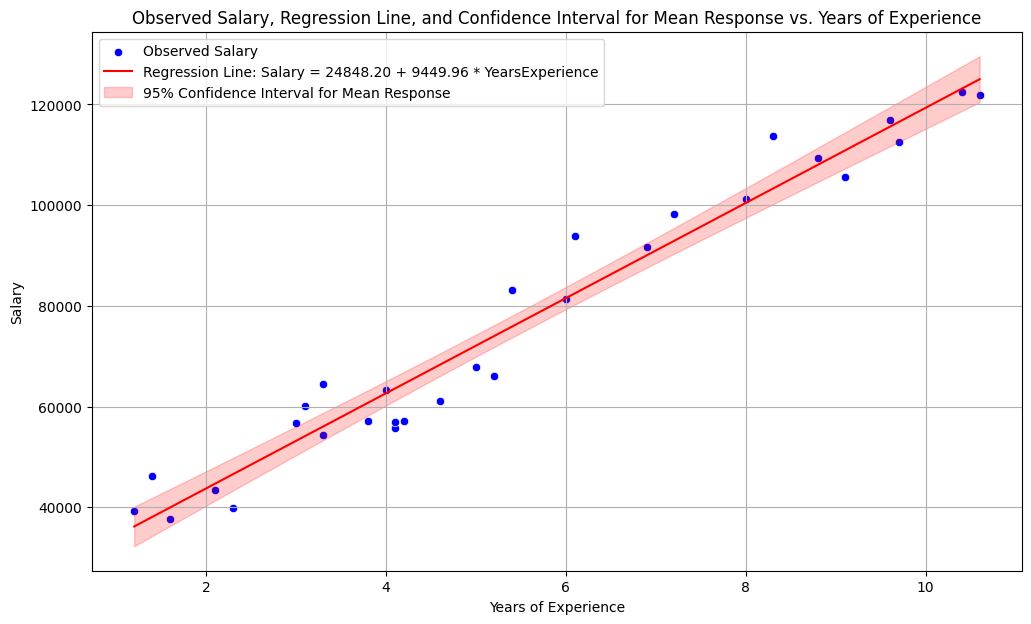

In [ ]:
# plotting the graph for the confidence interval

# Confidence interval for the mean response (E[Y | X = x*])
# The formula for the confidence interval for the mean response is:
# CI = ŷ* ± t_critical * SE_ŷ*
# where ŷ* is the predicted value at a specific x*, t_critical is the critical t-value, and SE_ŷ* is the standard error of the mean response at x*.

# SE_ŷ* = s * sqrt(1/n + (x* - x_bar)^2 / Sum of (xi - x_bar)^2)

# To plot the confidence interval, we need to calculate the upper and lower bounds for a range of x values.

# Generate a range of YearsExperience values to plot the confidence interval over
x_values = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100)

# Calculate the predicted salary for each x value in the range
predicted_y_values = β0 + β1 * x_values

# Calculate the standard error of the mean response for each x value
se_predicted_mean_response = rse * np.sqrt(1/n + (x_values - mean_years_experience)**2 / sum_of_years_experience_deviation_squared)

# Calculate the upper and lower bounds of the confidence interval
upper_bound_ci = predicted_y_values + t_critical * se_predicted_mean_response
lower_bound_ci = predicted_y_values - t_critical * se_predicted_mean_response

# Plot the original data, regression line, and confidence interval
plt.figure(figsize=(12, 7))

# Plot the observed salary values
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary', color='blue')

# Plot the regression line
plt.plot(df['YearsExperience'], df['Predicted_Salary'], color='red', linestyle='-', label=f'Regression Line: Salary = {β0:.2f} + {β1:.2f} * YearsExperience')

# Plot the confidence interval for the mean response
plt.fill_between(x_values, lower_bound_ci, upper_bound_ci, color='red', alpha=0.2, label=f'{int((1-alpha)*100)}% Confidence Interval for Mean Response')


plt.title('Observed Salary, Regression Line, and Confidence Interval for Mean Response vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()



# ***Prediction Interval Graph***

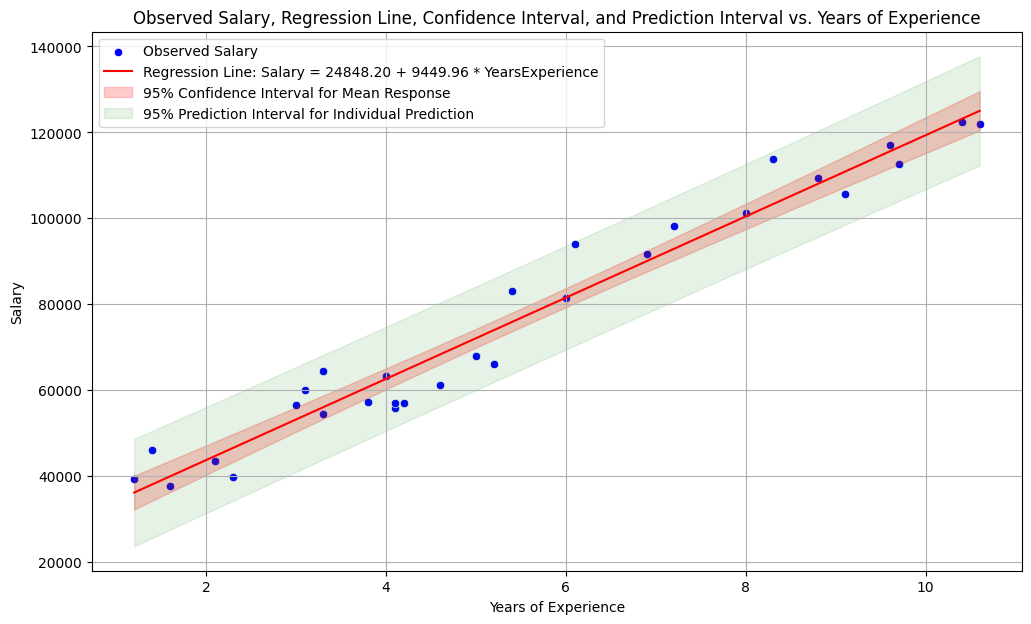

In [ ]:
# Confidence interval for individual predictions (Prediction Interval)
# The formula for the prediction interval for an individual prediction (Y | X = x*) is:
# PI = ŷ* ± t_critical * SE_individual_prediction
# where ŷ* is the predicted value at a specific x*, t_critical is the critical t-value, and SE_individual_prediction is the standard error of the individual prediction at x*.

# SE_individual_prediction = s * sqrt(1 + 1/n + (x* - x_bar)^2 / Sum of (xi - x_bar)^2)

# Calculate the standard error of individual predictions for each x value
se_individual_prediction = rse * np.sqrt(1 + 1/n + (x_values - mean_years_experience)**2 / sum_of_years_experience_deviation_squared)

# Calculate the upper and lower bounds of the prediction interval
upper_bound_pi = predicted_y_values + t_critical * se_individual_prediction
lower_bound_pi = predicted_y_values - t_critical * se_individual_prediction

# Plot the original data, regression line, confidence interval, and prediction interval
plt.figure(figsize=(12, 7))

# Plot the observed salary values
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary', color='blue')

# Plot the regression line
plt.plot(df['YearsExperience'], df['Predicted_Salary'], color='red', linestyle='-', label=f'Regression Line: Salary = {β0:.2f} + {β1:.2f} * YearsExperience')

# Plot the confidence interval for the mean response
plt.fill_between(x_values, lower_bound_ci, upper_bound_ci, color='red', alpha=0.2, label=f'{int((1-alpha)*100)}% Confidence Interval for Mean Response')

# Plot the prediction interval for individual predictions
plt.fill_between(x_values, lower_bound_pi, upper_bound_pi, color='green', alpha=0.1, label=f'{int((1-alpha)*100)}% Prediction Interval for Individual Prediction')


plt.title('Observed Salary, Regression Line, Confidence Interval, and Prediction Interval vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# ***Hypotheses of the linear regression***

In [ ]:
#hθ(x) = θ0 + θ1x1 + θ2x2
#h(x) = θT x

In [ ]:
df2 = df[['YearsExperience', 'Salary']].copy()
df2

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


# ***theta0=0 and theta1=0***

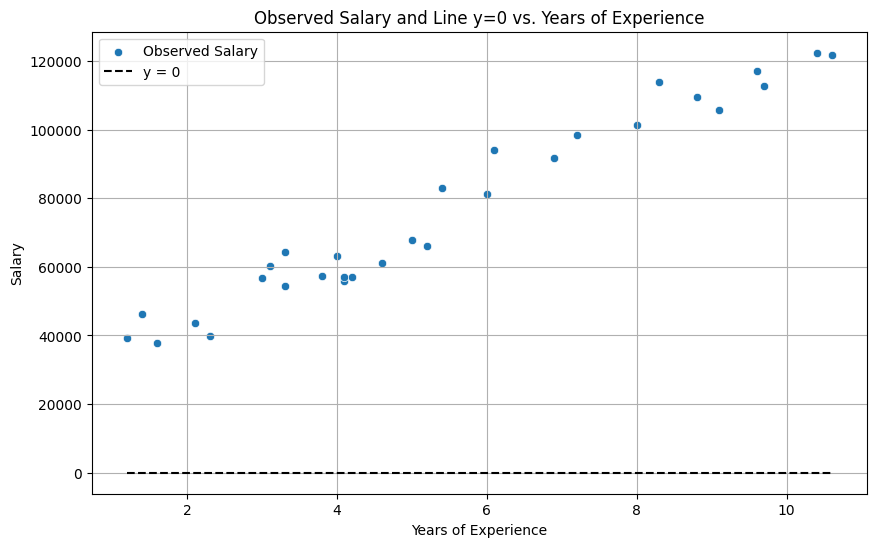

In [ ]:
import matplotlib.pyplot as plt
# Add a new column for the line y = 0
df2['Y_Equals_Zero'] = 0

# Plot the original data and the y=0 line
plt.figure(figsize=(10, 6))

# Plot the observed salary values
sns.scatterplot(x='YearsExperience', y='Salary', data=df2, label='Observed Salary')

# Plot the line y=0
plt.plot(df2['YearsExperience'], df2['Y_Equals_Zero'], color='black', linestyle='--', label='y = 0')

plt.title('Observed Salary and Line y=0 vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# **error calculation for the first iteration**

In [ ]:
# y_hat in the first iteration of gradient descent is often initialized to 0
df2['y_hat_initial'] = 0

# Calculate the error term (e = yi - y_hat)
df2['Error_initial'] = df2['Salary'] - df2['y_hat_initial']

# Display the relevant columns
print(df2[['YearsExperience', 'Salary', 'Error_initial']])


    YearsExperience    Salary  Error_initial
0               1.2   39344.0        39344.0
1               1.4   46206.0        46206.0
2               1.6   37732.0        37732.0
3               2.1   43526.0        43526.0
4               2.3   39892.0        39892.0
5               3.0   56643.0        56643.0
6               3.1   60151.0        60151.0
7               3.3   54446.0        54446.0
8               3.3   64446.0        64446.0
9               3.8   57190.0        57190.0
10              4.0   63219.0        63219.0
11              4.1   55795.0        55795.0
12              4.1   56958.0        56958.0
13              4.2   57082.0        57082.0
14              4.6   61112.0        61112.0
15              5.0   67939.0        67939.0
16              5.2   66030.0        66030.0
17              5.4   83089.0        83089.0
18              6.0   81364.0        81364.0
19              6.1   93941.0        93941.0
20              6.9   91739.0        91739.0
21        

In [ ]:
# Submission of ei*xi
# In the first iteration, the error 'ei' is df['Error_initial'] and 'xi' is df['YearsExperience']
submission_eixi = (df2['Error_initial'] * df2['YearsExperience']).sum()

print(f"Submission of eixi in the first iteration: {submission_eixi}")

# Submission of ei
# In the first iteration, this is the sum of the initial errors
submission_ei = df2['Error_initial'].sum()

print(f"Submission of ei in the first iteration: {submission_ei}")

Submission of eixi in the first iteration: 14550132.400000002
Submission of ei in the first iteration: 2280120.0


In [ ]:
# Calculate the derivatives using the current data and initial values
m = len(df2) # Number of training examples
m

30

# *calculating cost function*

In [ ]:
# Cost function J(θ) = (1/2m) * Σ(hθ(xi) - yi)^2
# where hθ(xi) = θ0 + θ1 * xi
# J(θ) = (1/2m) * Σ(θ0 + θ1 * xi - yi)^2

# Derivative of J(θ) with respect to θ0:
# ∂J/∂θ0 = (1/m) * Σ(θ0 + θ1 * xi - yi)
# ∂J/∂θ0 = (1/m) * Σ(hθ(xi) - yi)
# ∂J/∂θ0 = (1/m) * Σ(Predicted_Salary - Salary)
# ∂J/∂θ0 = (1/m) * Σ(-Error_initial)
# ∂J/∂θ0 = -(1/m) * Σ(Error_initial)

# Derivative of J(θ) with respect to θ1:
# ∂J/∂θ1 = (1/m) * Σ((θ0 + θ1 * xi - yi) * xi)
# ∂J/∂θ1 = (1/m) * Σ((hθ(xi) - yi) * xi)
# ∂J/∂θ1 = (1/m) * Σ((Predicted_Salary - Salary) * xi)
# ∂J/∂θ1 = (1/m) * Σ((-Error_initial) * xi)
# ∂J/∂θ1 = -(1/m) * Σ(Error_initial * xi)



# Derivative with respect to θ0
# In the first iteration, Predicted_Salary is initialized to 0, so (Predicted_Salary - Salary) = -Salary
# The error term (ei) is (Salary - Predicted_Salary). So (Predicted_Salary - Salary) = -ei
derivative_theta0 = -(1/m) * submission_ei # Since Error_initial = Salary - y_hat_initial = Salary - 0 = Salary
print(f"Derivative of J(θ) with respect to θ0 (using current prediction): {derivative_theta0:.4f}")
print("--------------")

# Derivative with respect to θ1
# In the first iteration, Error_initial = Salary. So this becomes -(1/m) * Σ(Salary * xi)
derivative_theta1 = -(1/m) * submission_eixi # Since Error_initial = Salary - y_hat_initial = Salary - 0 = Salary
print(f"Derivative of J(θ) with respect to θ1 (using current prediction): {derivative_theta1:.4f}")
print("--------------")


Derivative of J(θ) with respect to θ0 (using current prediction): -76004.0000
--------------
Derivative of J(θ) with respect to θ1 (using current prediction): -485004.4133
--------------


# ***calculating theta0 and theta 1***

In [ ]:
# Assume alpha (learning rate) is defined
alpha = 0.01 # Example learning rate

# θ0(updated) = θ0 - alpha * (Derivative of J(θ) with respect to θ0)
# In the first iteration, we assume initial θ0 = 0
theta0_initial = 0
theta0_updated = theta0_initial - alpha * derivative_theta0

print(f"Updated θ0 after the first step: {theta0_updated:.4f}")

theta1_initial = 0
theta1_updated = theta1_initial - alpha * derivative_theta1

print(f"Updated θ1 after the first step: {theta1_updated:.4f}")

Updated θ0 after the first step: 760.0400
Updated θ1 after the first step: 4850.0441


# *graph after first iteration*

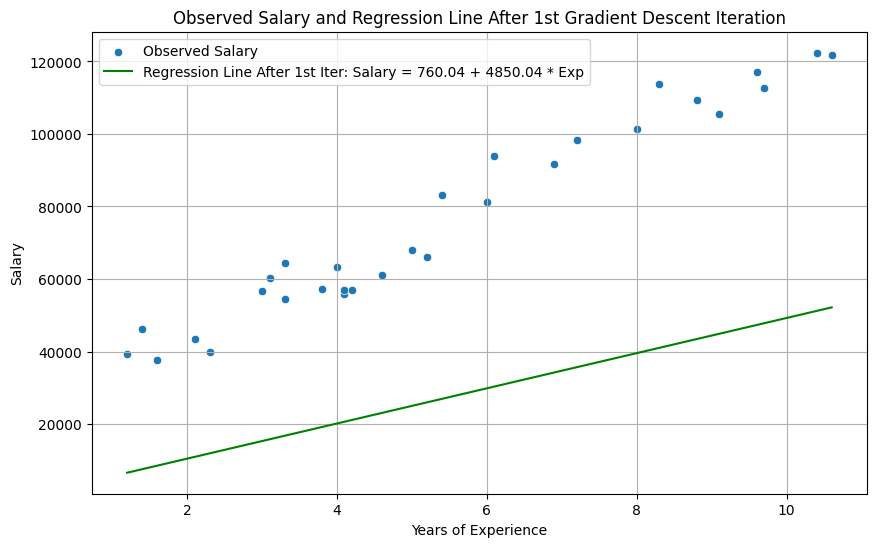

In [ ]:
import matplotlib.pyplot as plt
# Calculate the predicted salary using the updated coefficients
df2['Predicted_Salary_Iter1'] = theta0_updated + theta1_updated * df['YearsExperience']

# Plotting the initial state, the first regression line, and the observed data
plt.figure(figsize=(10, 6))

# Plot observed data
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary')

# Plot the line with initial coefficients (which is just y=0 if theta0_initial=0, theta1_initial=0)
# In this specific case, if initial theta0 and theta1 are 0, the line is y=0. We can plot this line or just the scatter.
# If we are showing the *first step* of improvement, we should plot the line with the *updated* coefficients.
# Let's plot the line based on the coefficients after the first update.

# Plot the regression line after the first iteration
plt.plot(df2['YearsExperience'], df2['Predicted_Salary_Iter1'], color='green', linestyle='-', label=f'Regression Line After 1st Iter: Salary = {theta0_updated:.2f} + {theta1_updated:.2f} * Exp')

plt.title('Observed Salary and Regression Line After 1st Gradient Descent Iteration')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the error for Predicted_Salary_Iter1
df2['Error_Iter1'] = df2['Salary'] - df2['Predicted_Salary_Iter1']

# Print the relevant columns to see the error
print(df2[['YearsExperience', 'Salary', 'Predicted_Salary_Iter1', 'Error_Iter1']])

    YearsExperience    Salary  Predicted_Salary_Iter1   Error_Iter1
0               1.2   39344.0             6580.092960  32763.907040
1               1.4   46206.0             7550.101787  38655.898213
2               1.6   37732.0             8520.110613  29211.889387
3               2.1   43526.0            10945.132680  32580.867320
4               2.3   39892.0            11915.141507  27976.858493
5               3.0   56643.0            15310.172400  41332.827600
6               3.1   60151.0            15795.176813  44355.823187
7               3.3   54446.0            16765.185640  37680.814360
8               3.3   64446.0            16765.185640  47680.814360
9               3.8   57190.0            19190.207707  37999.792293
10              4.0   63219.0            20160.216533  43058.783467
11              4.1   55795.0            20645.220947  35149.779053
12              4.1   56958.0            20645.220947  36312.779053
13              4.2   57082.0            21130.2

# *calculating error for the 2nd iteration*

In [ ]:
# The required values have already been calculated in the preceding code:
submission_eixi2 = (df2['Error_Iter1'] * df2['YearsExperience']).sum()
submission_ei2 = df2['Error_Iter1'].sum()

print(f"Submission of eixi in the first iteration: {submission_eixi2}")
print(f"Submission of ei in the first iteration: {submission_ei2}")

Submission of eixi in the first iteration: 9030154.797722666
Submission of ei in the first iteration: 1469671.6327466664


In [ ]:
derivative_theta0_2= -(1/m) * submission_ei2 # Since Error_initial = Salary - y_hat_initial = Salary - 0 = Salary
print(f"Derivative of J(θ) with respect to θ0 (using current prediction): {derivative_theta0_2:.4f}")
print("--------------")

# Derivative with respect to θ1
# In the first iteration, Error_initial = Salary. So this becomes -(1/m) * Σ(Salary * xi)
derivative_theta1_2 = -(1/m) * submission_eixi2 # Since Error_initial = Salary - y_hat_initial = Salary - 0 = Salary
print(f"Derivative of J(θ) with respect to θ1 (using current prediction): {derivative_theta1_2:.4f}")
print("--------------")

Derivative of J(θ) with respect to θ0 (using current prediction): -48989.0544
--------------
Derivative of J(θ) with respect to θ1 (using current prediction): -301005.1599
--------------


In [ ]:
alpha = 0.01 # Example learning rate

# θ0(updated) = θ0 - alpha * (Derivative of J(θ) with respect to θ0)
theta0_updated_2 = theta0_updated - alpha * derivative_theta0_2

print(f"Updated θ0 after the first step: {theta0_updated_2:.4f}")

theta1_updated_2 = theta1_updated - alpha * derivative_theta1_2

print(f"Updated θ1 after the first step: {theta1_updated_2:.4f}")

Updated θ0 after the first step: 1249.9305
Updated θ1 after the first step: 7860.0957


# *graph after 2nd iteration*

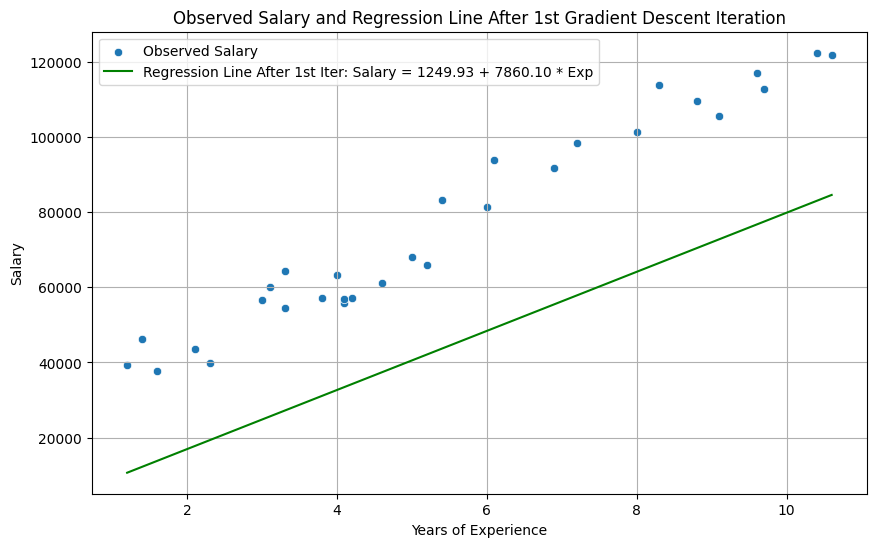

In [ ]:
import matplotlib.pyplot as plt

# Calculate the predicted salary using the updated coefficients
df2['Predicted_Salary_Iter1'] = theta0_updated_2 + theta1_updated_2 * df['YearsExperience']

# Plotting the initial state, the first regression line, and the observed data
plt.figure(figsize=(10, 6))

# Plot observed data
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary')

# Plot the line with initial coefficients (which is just y=0 if theta0_initial=0, theta1_initial=0)
# In this specific case, if initial theta0 and theta1 are 0, the line is y=0. We can plot this line or just the scatter.
# If we are showing the *first step* of improvement, we should plot the line with the *updated* coefficients.
# Let's plot the line based on the coefficients after the first update.

# Plot the regression line after the first iteration
plt.plot(df2['YearsExperience'], df2['Predicted_Salary_Iter1'], color='green', linestyle='-', label=f'Regression Line After 1st Iter: Salary = {theta0_updated_2:.2f} + {theta1_updated_2:.2f} * Exp')

plt.title('Observed Salary and Regression Line After 1st Gradient Descent Iteration')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

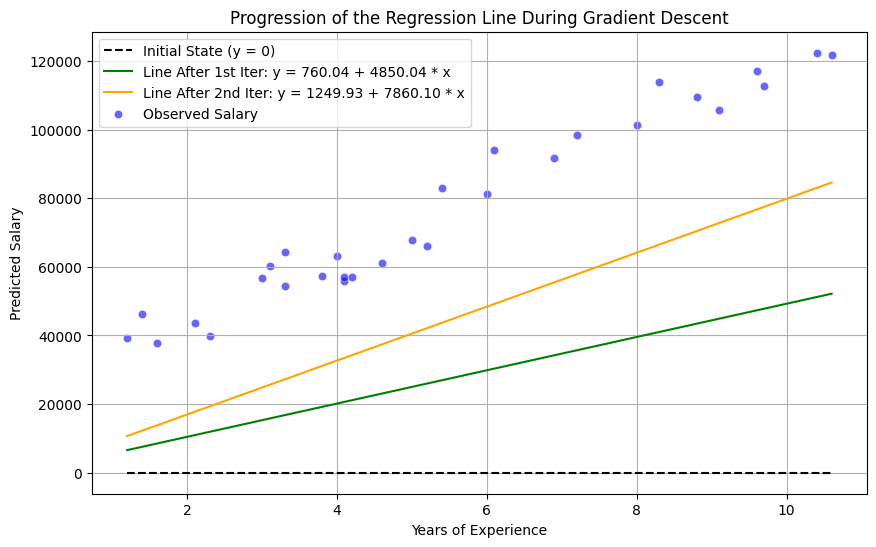

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# We want to plot the line y=0, the line after the 1st update, and the line after the 2nd update
# These lines are defined by the equations:
# 1. y = 0 (This is the initial state, equivalent to theta0=0, theta1=0)
# 2. y = theta0_updated + theta1_updated * x (Line after the first update)
# 3. y = theta0_updated_2 + theta1_updated_2 * x (Line after the second update)

# We need a range of x values (YearsExperience) to plot these lines over.
x_values = np.linspace(df2['YearsExperience'].min(), df2['YearsExperience'].max(), 100)

# Calculate y values for each line over the x_values range

# Line 1: y = 0
y_line_0 = 0 * x_values # Just a line at y=0

# Line 2: y = theta0_updated + theta1_updated * x
y_line_iter1 = theta0_updated + theta1_updated * x_values

# Line 3: y = theta0_updated_2 + theta1_updated_2 * x
y_line_iter2 = theta0_updated_2 + theta1_updated_2 * x_values

# Plotting the three lines
plt.figure(figsize=(10, 6))

# Plot the line y=0
plt.plot(x_values, y_line_0, color='black', linestyle='--', label='Initial State (y = 0)')

# Plot the regression line after the first iteration
plt.plot(x_values, y_line_iter1, color='green', linestyle='-', label=f'Line After 1st Iter: y = {theta0_updated:.2f} + {theta1_updated:.2f} * x')

# Plot the regression line after the second iteration
plt.plot(x_values, y_line_iter2, color='orange', linestyle='-', label=f'Line After 2nd Iter: y = {theta0_updated_2:.2f} + {theta1_updated_2:.2f} * x')

# Add observed data points for context (optional, but helpful)
sns.scatterplot(x='YearsExperience', y='Salary', data=df2, label='Observed Salary', color='blue', alpha=0.6)


plt.title('Progression of the Regression Line During Gradient Descent')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()


# *calculating loss and gradients*

Iteration 1: theta0=3800.2000, theta1=24250.2207, Cost=3251553638.8667
Iteration 2: theta0=846.6636, theta1=2500.6280, Cost=2612970925.0527
Iteration 3: theta0=3927.6938, theta1=21884.3538, Cost=2102170092.3556
Iteration 4: theta0=1608.1440, theta1=4487.6740, Cost=1693545091.1630
Iteration 5: theta0=4113.2730, theta1=19980.3818, Cost=1366621785.2140
Iteration 6: theta0=2299.7860, theta1=6064.3245, Cost=1105029408.4454
Iteration 7: theta0=4343.5862, theta1=18445.9821, Cost=895678163.7864
Iteration 8: theta0=2933.8944, theta1=7313.0798, Cost=728101648.6632
Iteration 9: theta0=4607.9928, theta1=17207.3303, Cost=593931072.4223
Iteration 10: theta0=3520.3424, theta1=8299.9005, Cost=486474851.7644
Iteration 11: theta0=4898.0189, theta1=16205.3930, Cost=400382464.1869
Iteration 12: theta0=4067.0582, theta1=9077.5221, Cost=331375672.3340
Iteration 13: theta0=5206.9227, theta1=15392.9636, Cost=276033616.6892
Iteration 14: theta0=4580.4144, theta1=9688.1060, Cost=231620980.2444
Iteration 15: the

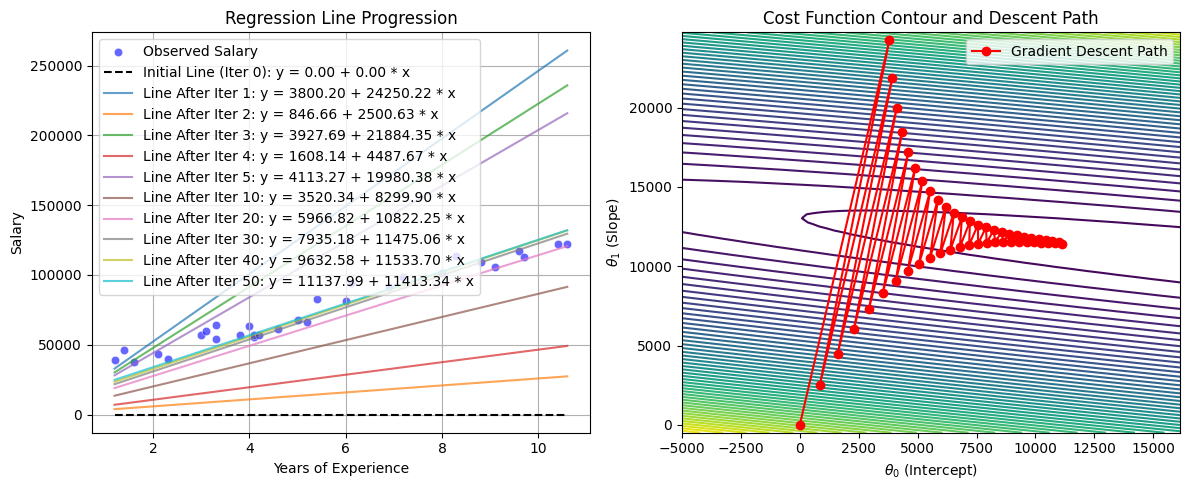

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def run_gradient_descent_steps(df, initial_theta0, initial_theta1, alpha, num_iterations):
    theta0 = initial_theta0
    theta1 = initial_theta1
    m = len(df)
    x = df['YearsExperience'].values
    y = df['Salary'].values

    # Prepare for regression line plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary', color='blue', alpha=0.6)
    x_plot = np.linspace(x.min(), x.max(), 100)

    # Store theta history
    theta_history = [(theta0, theta1)]

    # Initial line
    plt.plot(x_plot, theta0 + theta1 * x_plot, color='black', linestyle='--', label=f'Initial Line (Iter 0): y = {theta0:.2f} + {theta1:.2f} * x')

    for i in range(num_iterations):
        predictions = theta0 + theta1 * x
        errors = predictions - y

        derivative_theta0 = (1/m) * np.sum(errors)
        derivative_theta1 = (1/m) * np.sum(errors * x)

        theta0 = theta0 - alpha * derivative_theta0
        theta1 = theta1 - alpha * derivative_theta1
        theta_history.append((theta0, theta1))

        if (i + 1) <= 5 or (i + 1) % 10 == 0 or (i + 1) == num_iterations:
            plt.plot(x_plot, theta0 + theta1 * x_plot, linestyle='-', alpha=0.7, label=f'Line After Iter {i + 1}: y = {theta0:.2f} + {theta1:.2f} * x')

        print(f"Iteration {i+1}: theta0={theta0:.4f}, theta1={theta1:.4f}, Cost={np.mean(errors**2)/2:.4f}")

    # Regression plot settings
    plt.title('Regression Line Progression')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.grid(True)

    # --- Contour Plot of Cost Function ---
    plt.subplot(1, 2, 2)
    theta0_vals = np.linspace(min([t[0] for t in theta_history]) - 5000, max([t[0] for t in theta_history]) + 5000, 100)
    theta1_vals = np.linspace(min([t[1] for t in theta_history]) - 500, max([t[1] for t in theta_history]) + 500, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i, t0 in enumerate(theta0_vals):
        for j, t1 in enumerate(theta1_vals):
            preds = t0 + t1 * x
            J_vals[i, j] = np.mean((preds - y) ** 2) / 2

    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    plt.contour(T0, T1, J_vals.T, levels=50, cmap='viridis')
    plt.xlabel(r'$\theta_0$ (Intercept)')
    plt.ylabel(r'$\theta_1$ (Slope)')
    plt.title('Cost Function Contour and Descent Path')

    # Plot gradient descent path
    history_array = np.array(theta_history)
    plt.plot(history_array[:, 0], history_array[:, 1], marker='o', color='red', linestyle='-', label='Gradient Descent Path')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Run the function ---
# Use the dataframe 'df' that was already loaded and cleaned
# Use the calculated optimal betas from the previous section as a reference
optimal_beta0 = β0 # Using the variable calculated earlier
optimal_beta1 = β1 # Using the variable calculated earlier

# Initial parameters for gradient descent
initial_theta0 = 0  # Start with intercept at 0
initial_theta1 = 0  # Start with slope at 0
alpha = 0.05        # Learning rate
num_iterations = 50 # Number of steps to run

run_gradient_descent_steps(df, initial_theta0, initial_theta1, alpha, num_iterations)

# Optional: Run with different initial values or learning rates
# run_gradient_descent_steps(df, 10000, 1000, 0.001, 200) # Example with different start/alpha/iterations


# *ploting the cost function in the 3d space*

Iteration 1: theta0=3800.2000, theta1=24250.2207, Cost=3251553638.8667
Iteration 2: theta0=846.6636, theta1=2500.6280, Cost=2612970925.0527
Iteration 3: theta0=3927.6938, theta1=21884.3538, Cost=2102170092.3556
Iteration 4: theta0=1608.1440, theta1=4487.6740, Cost=1693545091.1630
Iteration 5: theta0=4113.2730, theta1=19980.3818, Cost=1366621785.2140
Iteration 6: theta0=2299.7860, theta1=6064.3245, Cost=1105029408.4454
Iteration 7: theta0=4343.5862, theta1=18445.9821, Cost=895678163.7864
Iteration 8: theta0=2933.8944, theta1=7313.0798, Cost=728101648.6632
Iteration 9: theta0=4607.9928, theta1=17207.3303, Cost=593931072.4223
Iteration 10: theta0=3520.3424, theta1=8299.9005, Cost=486474851.7644
Iteration 11: theta0=4898.0189, theta1=16205.3930, Cost=400382464.1869
Iteration 12: theta0=4067.0582, theta1=9077.5221, Cost=331375672.3340
Iteration 13: theta0=5206.9227, theta1=15392.9636, Cost=276033616.6892
Iteration 14: theta0=4580.4144, theta1=9688.1060, Cost=231620980.2444
Iteration 15: the

<ipython-input-56-6ae79ba38131>:80: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


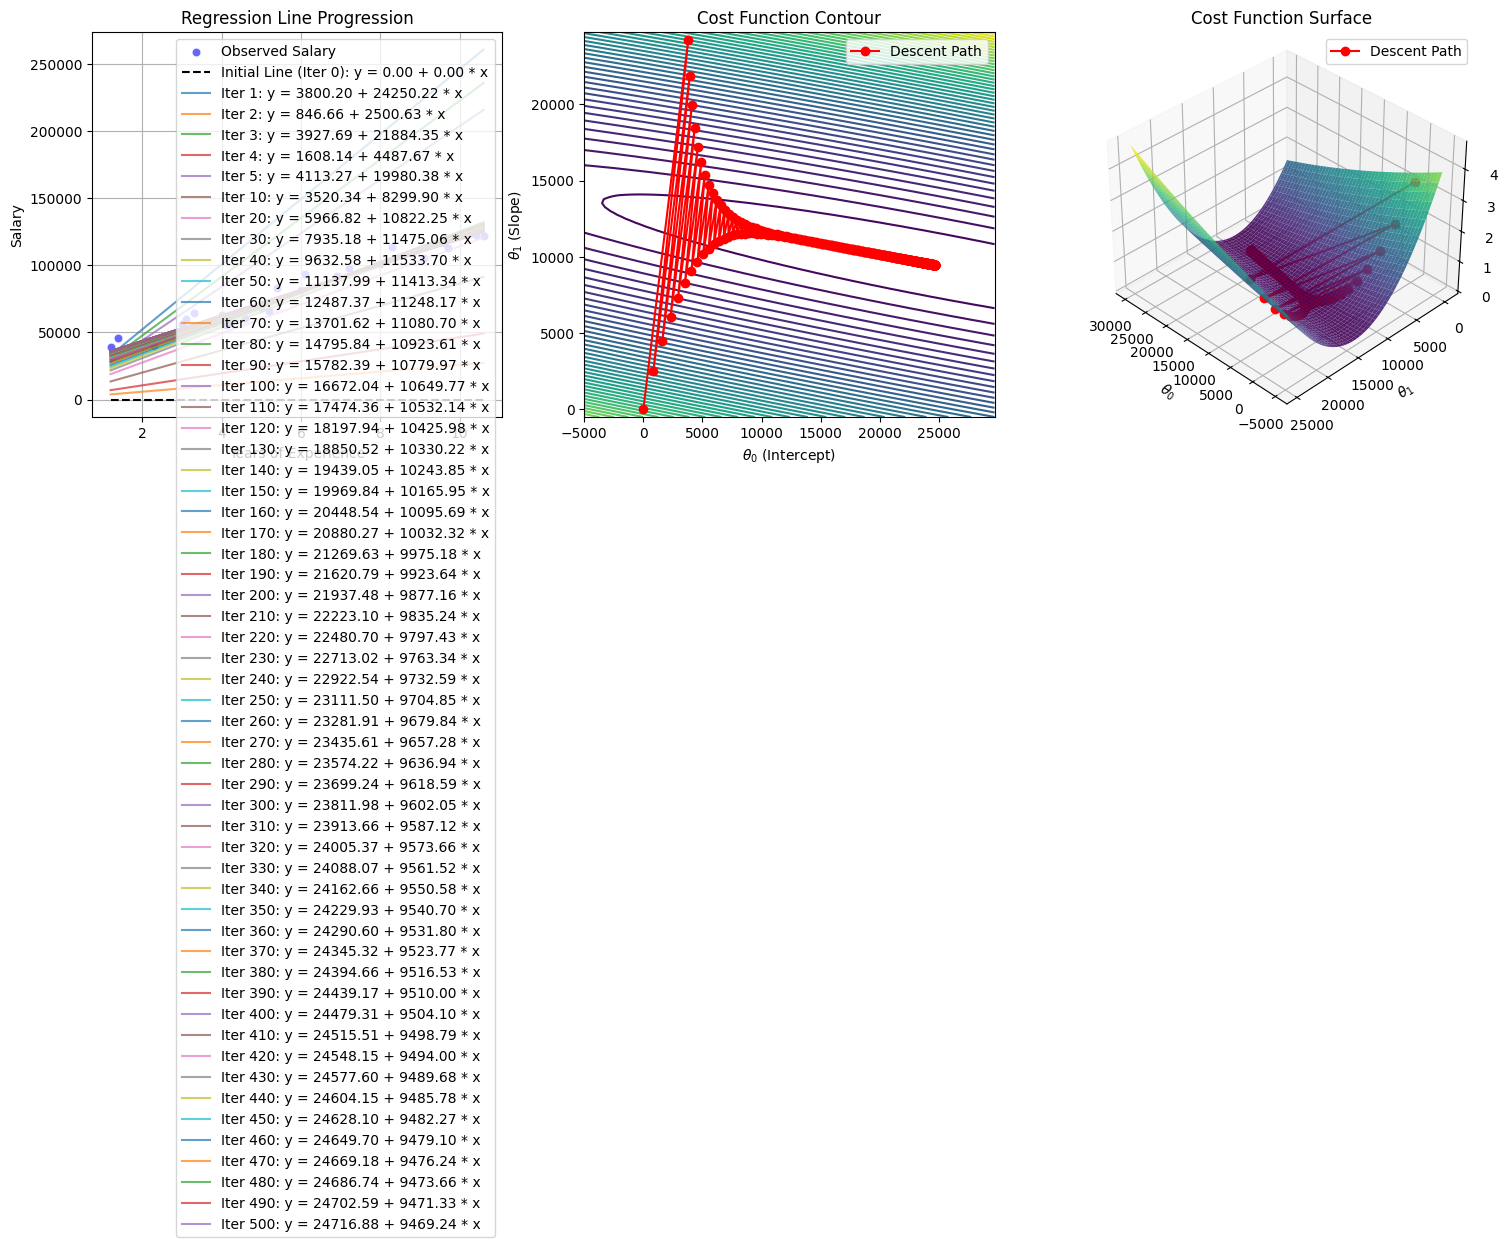

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def run_gradient_descent_steps(df, initial_theta0, initial_theta1, alpha, num_iterations):
    theta0 = initial_theta0
    theta1 = initial_theta1
    m = len(df)
    x = df['YearsExperience'].values
    y = df['Salary'].values

    # Prepare for plotting
    fig = plt.figure(figsize=(18, 5))

    # Subplot 1: Regression lines
    ax1 = fig.add_subplot(1, 3, 1)
    sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Observed Salary', color='blue', alpha=0.6, ax=ax1)
    x_plot = np.linspace(x.min(), x.max(), 100)

    theta_history = [(theta0, theta1)]

    ax1.plot(x_plot, theta0 + theta1 * x_plot, color='black', linestyle='--', label=f'Initial Line (Iter 0): y = {theta0:.2f} + {theta1:.2f} * x')

    for i in range(num_iterations):
        predictions = theta0 + theta1 * x
        errors = predictions - y

        derivative_theta0 = (1/m) * np.sum(errors)
        derivative_theta1 = (1/m) * np.sum(errors * x)

        theta0 = theta0 - alpha * derivative_theta0
        theta1 = theta1 - alpha * derivative_theta1
        theta_history.append((theta0, theta1))

        if (i + 1) <= 5 or (i + 1) % 10 == 0 or (i + 1) == num_iterations:
            ax1.plot(x_plot, theta0 + theta1 * x_plot, linestyle='-', alpha=0.7, label=f'Iter {i + 1}: y = {theta0:.2f} + {theta1:.2f} * x')

        print(f"Iteration {i+1}: theta0={theta0:.4f}, theta1={theta1:.4f}, Cost={np.mean(errors**2)/2:.4f}")

    ax1.set_title('Regression Line Progression')
    ax1.set_xlabel('Years of Experience')
    ax1.set_ylabel('Salary')
    ax1.legend()
    ax1.grid(True)

    # --- Grid for contour and 3D ---
    theta0_vals = np.linspace(min([t[0] for t in theta_history]) - 5000, max([t[0] for t in theta_history]) + 5000, 100)
    theta1_vals = np.linspace(min([t[1] for t in theta_history]) - 500, max([t[1] for t in theta_history]) + 500, 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    J_vals = np.zeros_like(T0)

    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            preds = T0[i, j] + T1[i, j] * x
            J_vals[i, j] = np.mean((preds - y) ** 2) / 2

    # Subplot 2: Contour plot
    ax2 = fig.add_subplot(1, 3, 2)
    contour = ax2.contour(T0, T1, J_vals, levels=50, cmap='viridis')
    ax2.plot(*zip(*theta_history), marker='o', color='red', linestyle='-', label='Descent Path')
    ax2.set_title('Cost Function Contour')
    ax2.set_xlabel(r'$\theta_0$ (Intercept)')
    ax2.set_ylabel(r'$\theta_1$ (Slope)')
    ax2.legend()

    # Subplot 3: 3D Surface Plot
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.9, edgecolor='none')
    ax3.plot(*zip(*theta_history), [np.mean((t0 + t1 * x - y) ** 2) / 2 for t0, t1 in theta_history],
             marker='o', color='red', label='Descent Path')
    ax3.set_title('Cost Function Surface')
    ax3.set_xlabel(r'$\theta_0$')
    ax3.set_ylabel(r'$\theta_1$')
    ax3.set_zlabel('Cost J')
    ax3.view_init(elev=35, azim=135)
    ax3.legend()

    plt.tight_layout()
    plt.show()
optimal_beta0 = β0 # Using the variable calculated earlier
optimal_beta1 = β1 # Using the variable calculated earlier

# Initial parameters for gradient descent
initial_theta0 = 0  # Start with intercept at 0
initial_theta1 = 0  # Start with slope at 0
alpha = 0.05        # Learning rate
num_iterations = 500 # Number of steps to run

run_gradient_descent_steps(df, initial_theta0, initial_theta1, alpha, num_iterations)